## Binary Classification

## Binary Classification with Logistic Regression

Binary classification is a supervised learning task where the goal is to categorize data points into one of two classes. In this notebook, we use logistic regression to predict whether a person bought insurance based on their age.

---

### What is Logistic Regression?

Logistic regression is a statistical model used for binary classification. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that a given input belongs to a particular class.

---

### Logistic (Sigmoid) Function

The core of logistic regression is the sigmoid function, which maps any real-valued number into the range (0, 1):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
$$
where ( z = w_0 + w_1 x_1 + w_2 x_2 \space+ \space ··· \space +\space w_n x_n ).
$$
<p align="center">
    <img src="A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing-3509717588.png" alt="Sigmoid Function" width="400"/>
</p>

---

### Model Prediction

Given an input \( X \), logistic regression computes the probability that the output \( y \) is 1 (positive class):
$$
P(y=1|X) = \sigma(w^T X + b)
$$
If this probability is greater than 0.5, we classify the input as class 1; otherwise, class 0.


<p align="center">
    <img src="output.png" alt="Sigmoid Function" width="400"/>
</p>

---

### Loss Function

Logistic regression uses the binary cross-entropy (log loss) as its cost function:
$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

where $( \hat{y}^{(i)} )$ is the predicted probability for the \( i \)-th sample.



<p align="center">
    <img src="output2.png" alt="Sigmoid Function" width="400"/>
</p>

---

### Training the Model

The model parameters are optimized using gradient descent to minimize the loss function.

---

### Evaluation

After training, we evaluate the model's accuracy on test data. In this notebook, the accuracy of our custom logistic regression model is **1.00** however it can change with its testing data.

---

<div align="center" style="display: flex; justify-content: center; gap: 40px;">
    <table>
        <tr>
            <td align="center">
                <img src="output4.png" alt="Custom Logistic Regression Curve" width="350"/><br>
                <b>Custom Logistic Regression</b>
            </td>
            <td align="center">
                <img src="output3.png" alt="Sklearn Logistic Regression Curve" width="350"/><br>
                <b>Sklearn Logistic Regression</b>
            </td>
        </tr>
    </table>
</div>

---


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
df =pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


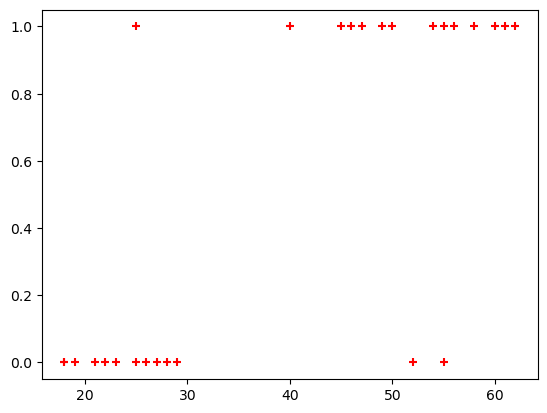

In [127]:
plt.scatter(df.age, df.bought_insurance, color='red', marker='+')

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)
x_test

,age
17,58
24,50
19,18


In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

1.0

In [ ]:
model.predict_proba(x_test)
model.predict([[45]])

### Building custom logistic regression model

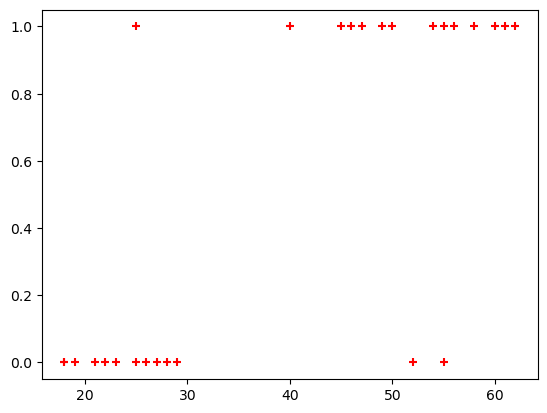

In [131]:
plt.scatter(df.age, df.bought_insurance, color='red', marker='+')

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

In [133]:
import numpy as np

class MyLogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.theta = np.zeros(X.shape[1] + 1)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        for _ in range(self.n_iter):
            linear_model = np.dot(X_b, self.theta)
            y_pred = self.sigmoid(linear_model)
            gradient = np.dot(X_b.T, (y_pred - y)) / y.size
            self.theta -= self.lr * gradient

    def predict_proba(self, X):
        X = np.array(X)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(np.dot(X_b, self.theta))

    def predict(self, X):
        return self.predict_proba(X) >= 0.5

# Usage:
my_model = MyLogisticRegression(lr=0.1, n_iter=1000)
my_model.fit(x_train, y_train)
preds = my_model.predict(x_test)
accuracy = np.mean(preds == y_test)
print("Custom model accuracy:", accuracy)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = np.mean(pred == y_test)
print("Sklearn model accuracy:", accuracy)

Custom model accuracy: 1.0
Sklearn model accuracy: 1.0


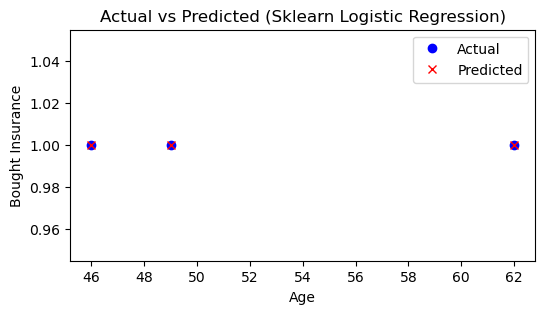

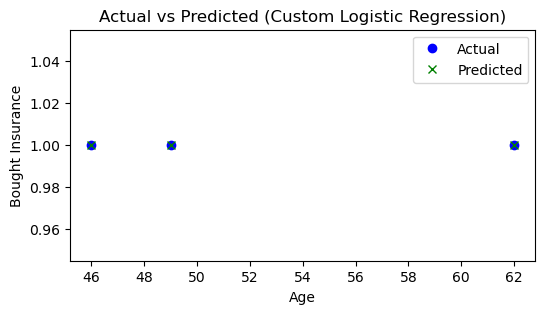

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(x_test.age.values, y_test.values, 'o', label='Actual', color='blue')
plt.plot(x_test.age.values, pred, 'x', label='Predicted', color='red')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.title('Actual vs Predicted (Sklearn Logistic Regression)')
plt.legend()
plt.show()

# custom model
plt.figure(figsize=(6, 3))
plt.plot(x_test.age.values, y_test.values, 'o', label='Actual', color='blue')
plt.plot(x_test.age.values, my_model.predict(x_test), 'x', label='Predicted', color='green')    
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.title('Actual vs Predicted (Custom Logistic Regression)')
plt.legend()
plt.show()

In [135]:
# explorting the custom model with pickle
import pickle
with open('my_logistic_model.pkl', 'wb') as file:
    pickle.dump(my_model, file)